In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

In [2]:
molset = ['small','large']
methods = ['3RESP','4IND','5PERM']

In [3]:
def read_error(filename):
    err = []
    with open(filename,'r') as f:
        while True:
            line = f.readline()
            if not line:
                break
            else:
                err.append([float(line.split(':')[2].split()[0]),float(line.split(':')[3])])
    return np.array(err)

In [5]:
results = {}
for mol in molset:
    for method in methods:
        fn = '{}/SUMMARY_{}.txt'.format(mol,method)
        data_tmp = read_error(fn)
        results['{}-{}'.format(mol,method)]=data_tmp
        
results

{'small-3RESP': array([[3.8500e-03, 1.9043e-01],
        [4.4100e-03, 4.2448e-01],
        [3.9300e-03, 2.5168e-01],
        [4.0000e-04, 2.0700e-03],
        [7.6000e-04, 3.6314e-01],
        [1.7900e-03, 9.5550e-02],
        [1.0000e-03, 8.5030e-02],
        [1.6000e-03, 2.4934e-01],
        [2.2500e-03, 1.9229e-01],
        [1.9900e-03, 1.3691e-01],
        [3.7200e-03, 2.4289e-01],
        [3.5300e-03, 1.5247e-01]]),
 'small-4IND': array([[0.00227, 0.11237],
        [0.00304, 0.29271],
        [0.00309, 0.19742],
        [0.00104, 0.00541],
        [0.00074, 0.35377],
        [0.00288, 0.15392],
        [0.00249, 0.21115],
        [0.003  , 0.46677],
        [0.00163, 0.13897],
        [0.00137, 0.09424],
        [0.00191, 0.1244 ],
        [0.00212, 0.09142]]),
 'small-5PERM': array([[0.00061, 0.03021],
        [0.00304, 0.29269],
        [0.00228, 0.14564],
        [0.00106, 0.00553],
        [0.00048, 0.23059],
        [0.00132, 0.07056],
        [0.00124, 0.10541],
        [0.0

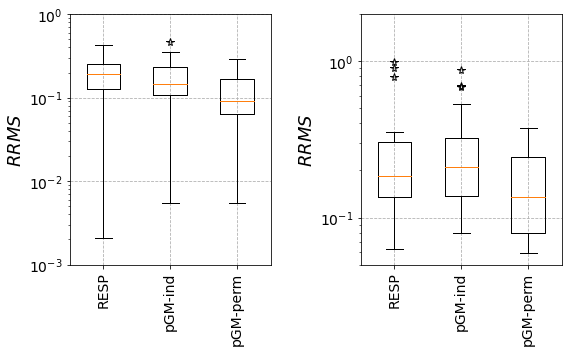

In [26]:
xl = ['RESP','pGM-ind','pGM-perm']

fig = plt.figure(figsize=(8,5)) 

ax00 =fig.add_subplot(1,2,1)
ax00.boxplot([results['small-3RESP'][:,1],results['small-4IND'][:,1],results['small-5PERM'][:,1]],\
                 boxprops={'color':'black'},\
                 flierprops={'marker':'*','markeredgecolor':'black','markersize':8},\
                 whiskerprops={'linestyle':'-','color':'black'},\
                 widths=0.5, positions=np.arange(1,len(xl)+1,1))

ax00.xaxis.set_tick_params(labelsize=14)
ax00.yaxis.set_tick_params(labelsize=14)

ax00.set_xticklabels(xl,rotation=90,fontsize=14)

y_major = LogLocator(base=10, numticks=3)
ax00.yaxis.set_major_locator(y_major)

ax00.set_ylim(10**-3,10**0)

ax00.set_yscale('log',base=10)

ax00.set_ylabel(r'$RRMS$',fontsize=18,fontfamily='sans-serif')

plt.grid(ls='--')

ax01 = fig.add_subplot(1,2,2)
ax01.boxplot([results['large-3RESP'][:,1],results['large-4IND'][:,1],results['large-5PERM'][:,1]],\
                 boxprops={'color':'black'},\
                 flierprops={'marker':'*','markeredgecolor':'black','markersize':8},\
                 whiskerprops={'linestyle':'-','color':'black'},\
                 widths=0.5, positions=np.arange(1,len(xl)+1,1))

ax01.xaxis.set_tick_params(labelsize=14)
ax01.yaxis.set_tick_params(labelsize=14)

ax01.set_xticklabels(xl,rotation=90,fontsize=14)

ax01.set_ylim(5*10**-2,2*10**0)
ax01.set_yscale('log',base=10)

#ax01.tick_params(axis='y',labelleft=False)

ax01.yaxis.set_major_locator(y_major)
ax01.set_yscale('log',base=10)
ax01.set_ylabel(r'$RRMS$',fontsize=18,fontfamily='sans-serif')

plt.grid(ls='--')

plt.tight_layout()
plt.subplots_adjust(wspace=0.45)

plt.savefig('345_cmps.png',dpi=800,bbox_inches='tight')